In [15]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("retail_sales_dataset.csv") 
df.head()  


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [25]:
df = df.dropna()

In [33]:
high_orders = (df['Quantity'] > 2).sum()
total_orders = len(df)
p_high_order = high_orders / total_orders

print(f"Total Orders: {total_orders}")
print(f"High Orders (>2 items): {high_orders}")
print(f"P(High Order) = {p_high_order:.4f}")


Total Orders: 1000
High Orders (>2 items): 504
P(High Order) = 0.5040


In [35]:
from scipy.stats import binom

n_days = 30 
k_high_orders = 5  
prob_5_high_orders = binom.pmf(k_high_orders, n_days, p_high_order)

print(f"P(Exactly 5 High-Order Days in {n_days} days) = {prob_5_high_orders:.4f}")

P(Exactly 5 High-Order Days in 30 days) = 0.0001


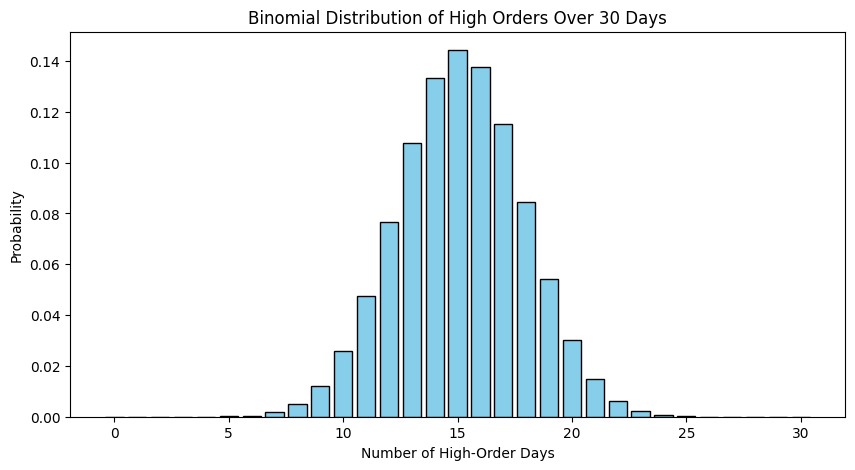

In [39]:
k_values = np.arange(0, n_days + 1)
probabilities = binom.pmf(k_values, n_days, p_high_order)

plt.figure(figsize=(10, 5))
plt.bar(k_values, probabilities, color='skyblue', edgecolor='black')
plt.xlabel("Number of High-Order Days")
plt.ylabel("Probability")
plt.title(f"Binomial Distribution of High Orders Over {n_days} Days")
plt.show()